In [1]:
### Imports and Constants

import numpy as np
import matplotlib.pyplot as plt

m_e = 9.1093897e-28
c = 2.99792458e10
e = 4.8032068e-10
pi = 3.1415926535
f = 0.416
lambda_0 = 1215.67e-8 # rest-frame LyAlpha wavelength in cgs

In [2]:
### Auxiliary Functions

def NtoAOD(N, b): # converts from Number Density (in per cm sq.) to Optical Depth
    tau = ( ( np.sqrt(pi) * (e ** 2) ) / ( m_e * c ) ) * ( f * lambda_0 * N / b )
    return(tau)

def W(N, b): # calculates Equivalent Width, given the Doppler b parameter, and Number density
    tau = NtoAOD(N, b)
    if(tau < 2):
        W = ( pi * (e ** 2) ) / ( m_e * (c ** 2) ) * (lambda_0 ** 2) * N * f 
    elif(tau > 2 and tau < 1000):
        W = ( (b * lambda_0) / c ) * ( np.sqrt( np.log(tau) ) )
    else:
        W = np.sqrt(2 * pi * tau)
    return(W)

In [3]:
### Declaring required grids and Main Calculations

b = np.arange(1.5e6, 1.05e7, 1.5e6) # Doppler b parameters in cm/s
N = np.logspace(12, 21, 100) # Number densities in per cm sq.
widths = np.zeros((np.size(N), np.size(b)))
for i in range(np.size(N)):
    for j in range(np.size(b)):
        widths[i, j] = W(N[i], b[j])

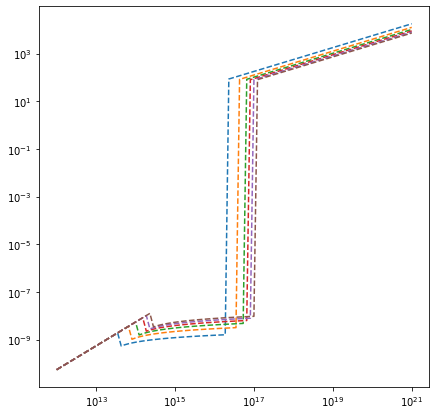

In [4]:
### Plotting

fig = plt.figure()
fig.set_size_inches(7,7)
for i in range(np.size(b)):
    plt.loglog(N, widths[:, i],'--')

Maybe soften out the transitions?